Importing necssary libraries after installing

In [25]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [26]:
#Loading the youtube video link
video = "https://www.youtube.com/watch?v=vW2Ndhmx1CA"

In [27]:
#splitting the url into index and store it as a variable
video_index_id = video.split("=")[1]

In [28]:
video_index_id

'vW2Ndhmx1CA'

Showing the dispaly picture(or thumbnail) of the used video from YouTube

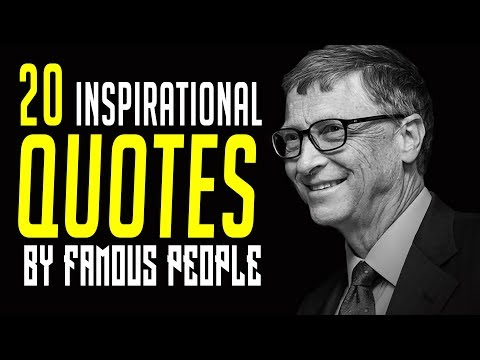

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_index_id)

From YouTubeTranscriptApi Module a "class" has been imported, the previously created video index then passed through it.
It transcript a section of video clip into a json format file(dictionary) which later is converted into text file.

In [6]:
YouTubeTranscriptApi.get_transcript(video_index_id)

[{'text': '[Music]', 'start': 0.12, 'duration': 13.86},
 {'text': 'action is the foundational key to all',
  'start': 11.42,
  'duration': 7.6},
 {'text': "success Pablo Picasso don't aim for",
  'start': 13.98,
  'duration': 7.29},
 {'text': 'success if you want it just do what you',
  'start': 19.02,
  'duration': 4.29},
 {'text': 'love and believe in and it will come',
  'start': 21.27,
  'duration': 7.679},
 {'text': 'naturally David Frost when you take',
  'start': 23.31,
  'duration': 7.379},
 {'text': 'risks you learn that there will be times',
  'start': 28.949,
  'duration': 3.571},
 {'text': 'when you succeed and there will be times',
  'start': 30.689,
  'duration': 4.231},
 {'text': 'when you fail and both are equally',
  'start': 32.52,
  'duration': 8.039},
 {'text': "important ellen degeneres if you're",
  'start': 34.92,
  'duration': 7.86},
 {'text': 'going to be thinking anything you might',
  'start': 40.559,
  'duration': 6.531},
 {'text': 'as well think big Donald 

Converting the dictionary into a simple text file

In [8]:
transcript_video = YouTubeTranscriptApi.get_transcript(video_index_id)
conv = ''

for i in transcript_video:
    conv += '' + i['text']

print('The converted text file is: ', conv)

The converted text file is:  [Music]action is the foundational key to allsuccess Pablo Picasso don't aim forsuccess if you want it just do what youlove and believe in and it will comenaturally David Frost when you takerisks you learn that there will be timeswhen you succeed and there will be timeswhen you fail and both are equallyimportant ellen degeneres if you'regoing to be thinking anything you mightas well think big Donald Trumpif you don't build your dream someoneelse will hire you to help them buildtheirs droop hi Anthonyif you are born poor it's not yourmistake but if you die 4 it's yourmistakeBill Gates saying it is impossible tolive without failing as something isimpossible unless you live so cautiouslythat you might as well not have lived atall in which case you have failed bydefaultJK Rowling I've missed more than 9,000shots in my career I've lost almost 300games 26 times I've been trusted to takethe game-winning shot and missedI failed over and over and over again inmy life

# Creation of model

In [18]:
text_summarizer = pipeline('summarization')

No model was supplied, defaulted to t5-small and revision d769bba (https://huggingface.co/t5-small).
Using a pipeline without specifying a model name and revision in production is not recommended.


All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


C:\Users\Suvronil Chatterjee\anaconda3\lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:156: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


Iterating the model for a chunk of text as the length of the text is high, it can only summarize for a threshold of lines
and words (similar has been done when using NLP, setting word counts, tokenization and threshold counts). The minimum and
maximum length has been set to summarize.

In [24]:
iteration = int(len(conv)/1000)
summary = []

for i in range(0,iteration+1):
    start = 0
    start = i*1000
    end = (i+1)*1000
    out = text_summarizer(conv[start:end], min_length=5,  max_length=50)
    out = out[0]
    out = out['summary_text']
    summary.append(out)
    
print(summary)

["if you die 4 it's yourmistakeBill Gates says it is impossible to live without failing as something isimpossible unless you live so cautiously that you might as well not have lived at all ", 'the futuredepends on what we do in present MahatmaGandhi the successful warrior is theaverage man with laser-like focus BruceLeethe difference between a successfulperson and others is not a lack ofs', "r who never gives upnelson mandela you can't connect thedots looking forward you can only connect them looking backward so youhave to trustin something your gut destiny life karmawhatever this"]
